In [36]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [62]:
import warnings 
warnings.filterwarnings('ignore')

In [37]:
vehicle_data = pd.read_csv('vehicle.csv')

In [38]:
vehicle_data.shape

(846, 19)

In [39]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [40]:
vehicle_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [41]:
vehicle_data.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [42]:
vehicle_data.dropna(inplace=True)

In [43]:
vehicle_data.shape

(813, 19)

In [44]:
vehicle_data.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# Explore and Visualize dataset

In [45]:
vehicle_data['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

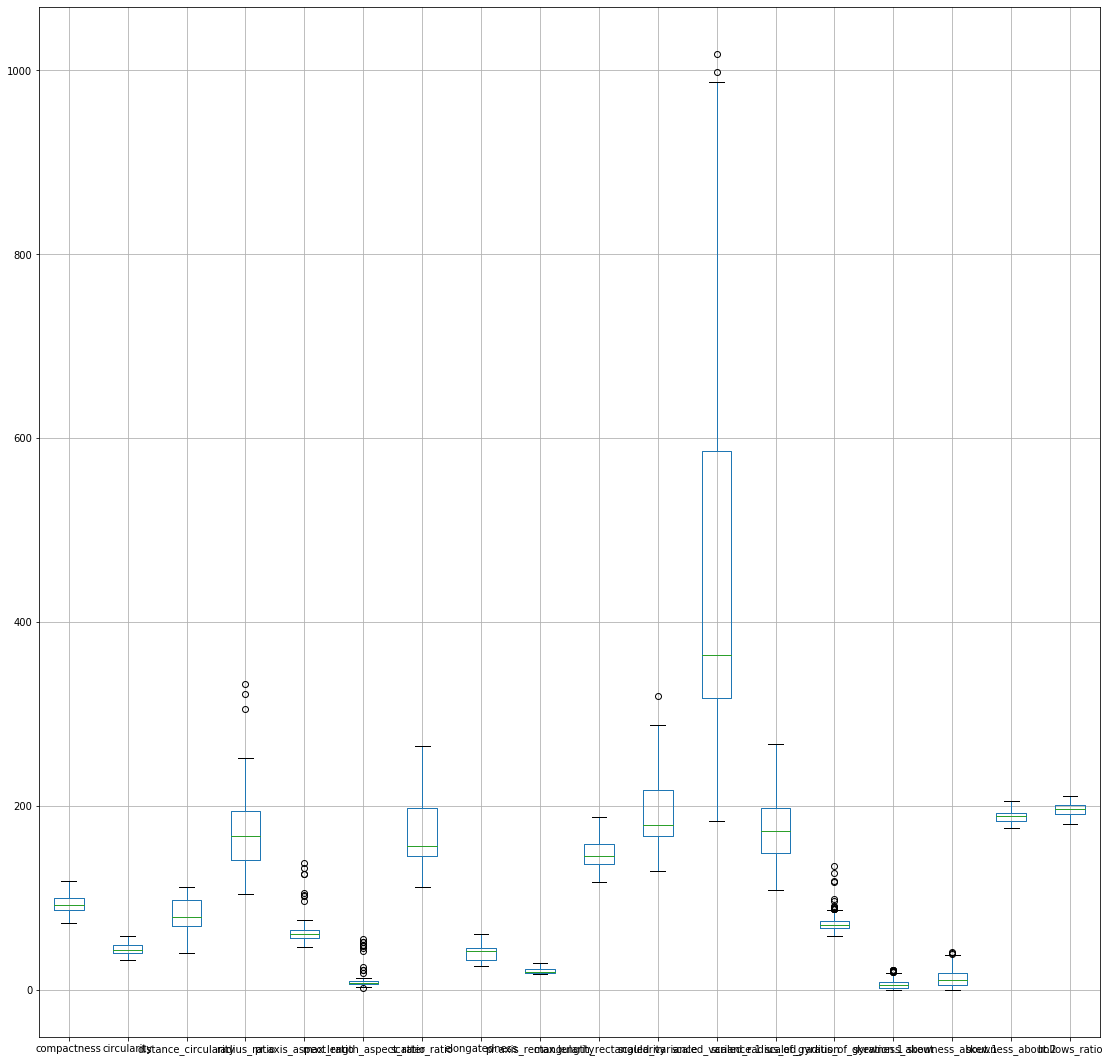

In [46]:
l = vehicle_data.columns.values
number_of_columns=len(l)
number_of_rows = len(l)-1/number_of_columns
vehicle_data.boxplot(figsize=(number_of_columns, number_of_rows))

In [47]:
Q1 = vehicle_data.quantile(0.25)
Q3 = vehicle_data.quantile(0.75)
IQR = Q3 - Q1

In [48]:
vehicle_data = vehicle_data[~((vehicle_data < (Q1 - 1.5 * IQR)) |(vehicle_data > (Q3 + 1.5 * IQR))).any(axis=1)]
vehicle_data.shape

(778, 19)

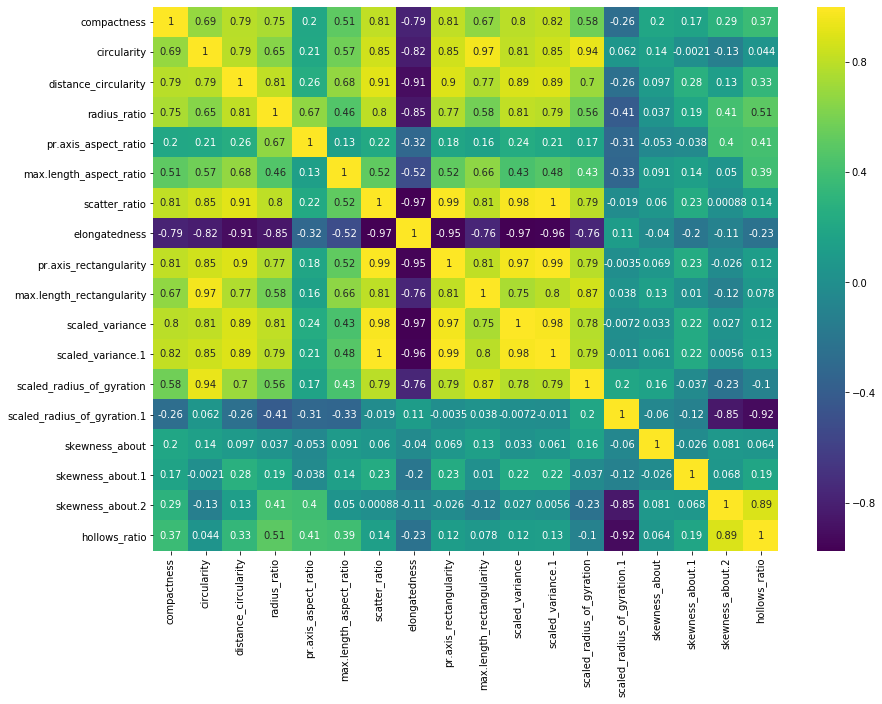

In [50]:
plt.figure(figsize=(14,10))
sns.heatmap(vehicle_data.corr(),cmap='viridis',annot=True) 

In [68]:
vehicle_data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [51]:
scaler = MinMaxScaler()

In [52]:
vehicle_data_scaled = scaler.fit_transform(vehicle_data.iloc[0:, 0:18])

In [53]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(vehicle_data_scaled)

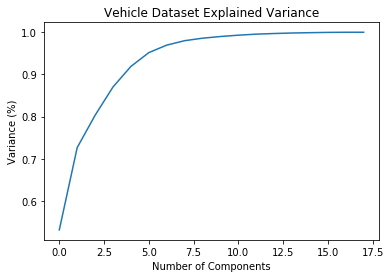

In [54]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Vehicle Dataset Explained Variance')
plt.show()

In [55]:
pca = PCA(n_components=7)
vehicle_data_with_red_dimensions = pca.fit_transform(vehicle_data_scaled)


In [56]:
X = vehicle_data_with_red_dimensions
y = vehicle_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=1)


In [63]:
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [0.01, 0.05, 0.5, 1], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


In [64]:
svc = svm.SVC(C = 1, kernel='rbf')
#cross Validating the svc model 
cv = cross_validate(svc, X, y, return_train_score=True, cv=5)
print("Accuracy on train data is: ", cv['train_score'])

Accuracy on train data is:  [0.88745981 0.89871383 0.88906752 0.8988764  0.89245586]


In [65]:
print("Accuracy on test data is: ", cv['test_score'])

Accuracy on test data is:  [0.91025641 0.86538462 0.90384615 0.87096774 0.85806452]


In [66]:
#Calculate Mean score
print("Mean score of the models performance is: ", cv['test_score'].mean())

Mean score of the models performance is:  0.8817038875103391


In [67]:
# Calculate score standard deviation using std()
print("Standard deviation of the models performance is: ", cv['test_score'].std())

Standard deviation of the models performance is:  0.02119400791484386
